In [1]:
# Import Packages
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

In [334]:
# Dense Layer 1
class Layer_Dense_In:

  # Layer initialization
  def __init__(self,n_inputs,n_neurons,variance):
    # Initialize weights and biases
    self.weights = np.ones((n_inputs, n_neurons))
    self.biases = variance * np.random.randn(1,n_neurons)
    self.biases = np.array([[0.01,-1/2-0.002]])

  # Forward pass
  def forward(self,inputs):
    # Calculate output values from inputs, weights and biases
    self.output = np.dot(inputs, self.weights) + self.biases

# Dense Layer 2
class Layer_Dense_Out:
  
  # Layer initialization
  def __init__(self,n_inputs,n_neurons,variance):
    # Initialize weights and biases
    self.weights = variance * np.random.randn(n_inputs, n_neurons)
    self.biases = variance * np.random.randn(1,n_neurons)
    self.weights = np.array([[1.9999],[-4]])
    self.biases = np.array([[0]])

  # Forward pass
  def forward(self,inputs):
    # Calculate output values from inputs, weights and biases
    self.output = np.dot(inputs, self.weights)

In [335]:
# ReLU activation
class Activation_ReLU:

  # Forward pass
  def forward(self,inputs):
    # Calculate output values from inputs
    self.output = np.maximum(0,inputs)

In [336]:
# Data Flow at every composition

def RNN_Pass(input):

  layer_in.forward(input)
  layer_act1.forward(layer_in.output)
  layer_out.forward(layer_act1.output)
  layer_act2.forward(layer_out.output)

  return layer_out.output[0][0]

In [337]:
# Run this cell if you wish to randomly initialize a new RNN
variance = 2
width = 2

layer_in = Layer_Dense_In(1,width,variance)
layer_out = Layer_Dense_Out(width,1,variance)
layer_act1 = Activation_ReLU()
layer_act2 = Activation_ReLU()

[[1. 1.]]
Biases1 [[ 0.01  -0.502]]
Weights2 [[ 1.9999]
 [-4.    ]]
Biases2 [[0]]


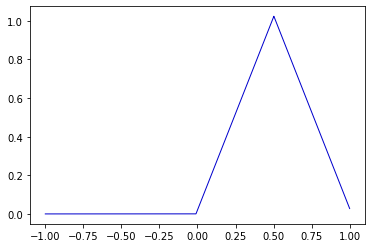

0.019999


In [338]:
# Main Loop - Mapping of [0,1] -> [0,1]

# Initialization parameters:
# * Network Depth
# * Variance
# * Image Resolution

depth = 1
X_granularity = 12587
window = 1
test_X = np.linspace(-window,window,num=X_granularity, endpoint=True)
test_X_plot = np.linspace(-window,window,num=X_granularity, endpoint=True)
#test_X_plot = np.array([0.5])

#for i in range(len(test_X_plot)):
#  test_X_plot[i] = RNN_Pass(test_X_plot[i])

#plt.plot(test_X,test_X_plot)
#plt.show()

# Function calculation
for iter in range(len(test_X)):
  for pos in range(depth):
    #print("Iter: ",iter," f(",test_X_plot[iter],") = ")
    test_X_plot[iter] = RNN_Pass(test_X_plot[iter])
    #print(test_X_plot[iter])

print(layer_in.weights)
print("Biases1",layer_in.biases)
print("Weights2",layer_out.weights)
print("Biases2",layer_out.biases)


# Plots
#figure(figsize=(16, 6), dpi=80)
#plt.figure(dpi=600)
#plt.subplot(1, 2, 1)
#plt.plot(test_X,test_X_plot,linewidth=1,c='mediumblue')
#plt.subplot(1, 2, 2)
plt.plot(test_X,test_X_plot,linewidth=1,c='mediumblue')
#plt.tight_layout()
plt.show()

print(test_X_plot[int(X_granularity/2)])

In [ ]:
test1 = 0.175422
test2 = test1+0.0000001

depth = 300
zero_axis=np.zeros(depth)

plot_test1 = [test1]
plot_test2 = [test2]
plot_test3 = []



for pos in range(depth):
  #print("Mapping ", plot_test1[-1], " to ", RNN_Pass(plot_test1[-1]))

  plot_test1.append(RNN_Pass(plot_test1[-1]))
  plot_test2.append(RNN_Pass(plot_test2[-1]))
  plot_test3.append(abs(plot_test1[-1]-plot_test2[-1]))

#figure(figsize=(8, 6), dpi=160)
#plt.plot(plot_test1,linewidth=1)
#plt.plot(plot_test2,linewidth=1)

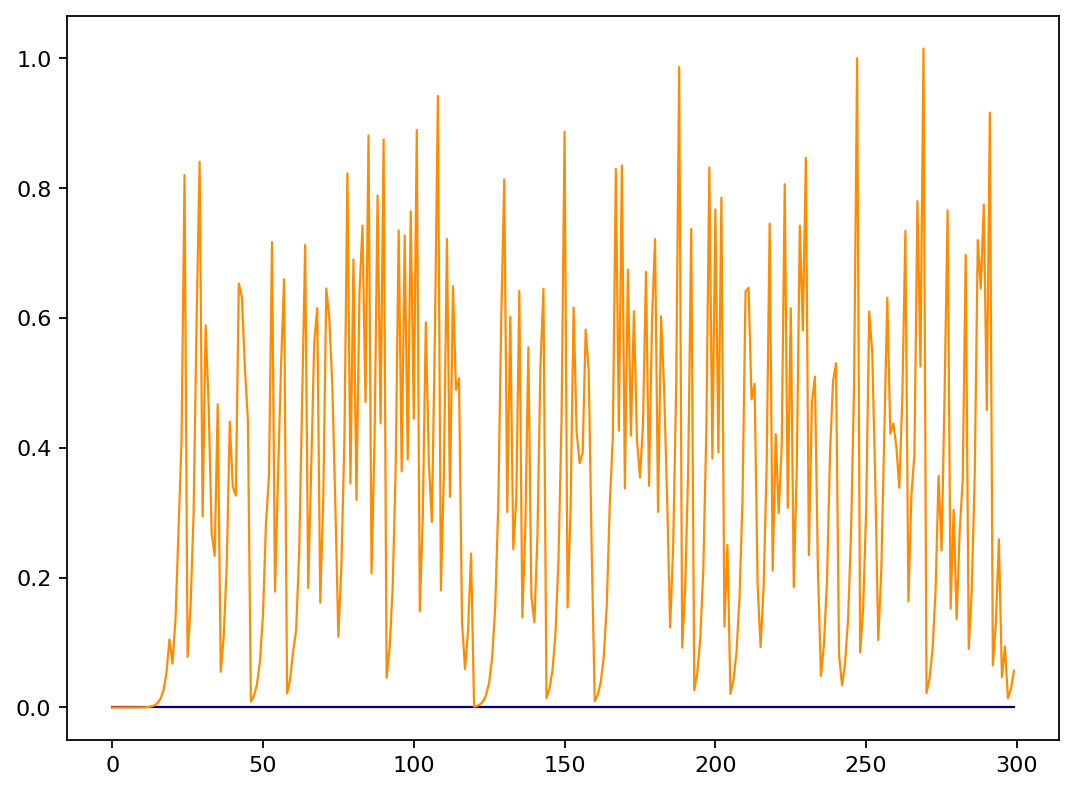

In [392]:
figure(figsize=(8,6),dpi=160)
plt.plot(zero_axis,linewidth=1,c='navy')
plt.plot(plot_test3,linewidth=1,c='darkorange')